### digit dataset
- Optical Recognition of Handwritten Digits Data Set
- 손 글씨로 쓴 숫자를 분류하는 데이터 셋
- MNIST가 원조, scikit-learn에서 8 by 8 image 제공

### Data Loading

In [1]:
from sklearn import datasets

digit_dataset = datasets.load_digits()
digit_dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [2]:
print(digit_dataset['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digit_dataset['data'][0].reshape(-1, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [4]:
digit_dataset['data'].shape   # 기본 제공되는 데이터 각각은 8 * 8 = 64로 flatten되어 있음

(1797, 64)

In [5]:
digit_dataset['target_names']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
digit_dataset['images'][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

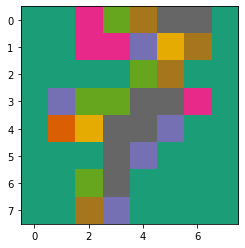

In [7]:
from matplotlib import pyplot as plt

plt.imshow(digit_dataset['images'][7], cmap = plt.cm.Dark2)
plt.show()

In [8]:
X = digit_dataset['data']
y = digit_dataset['target']
y[:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

### Multiclass for LogisticRegression Class
- sklearn.linear_model.LogisticRegression 안에 'multi_class'라는 argument가 있음
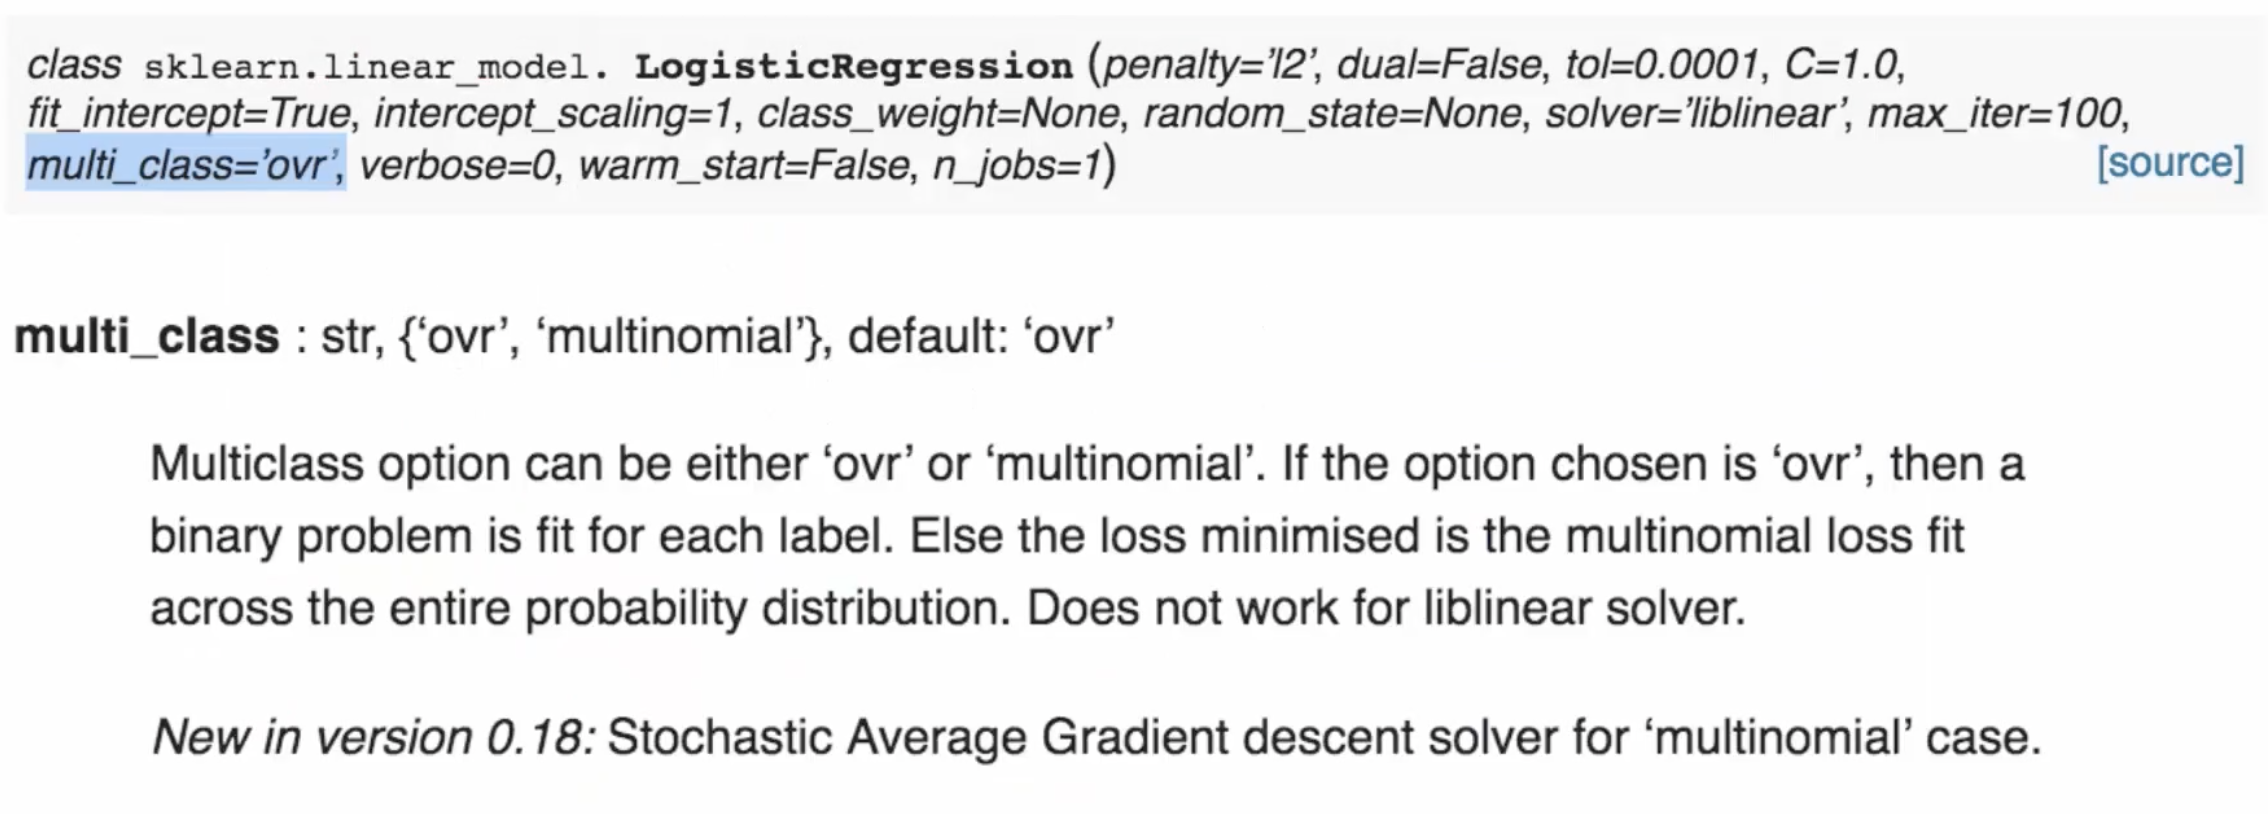
- multi_class : {'ovr', 'multinomial'}, default: 'ovr'
- ovr(One vs Rest) : binary problem
- multinomial : softmax가 적용됨 → normalize해줘서 성능이 더 좋음
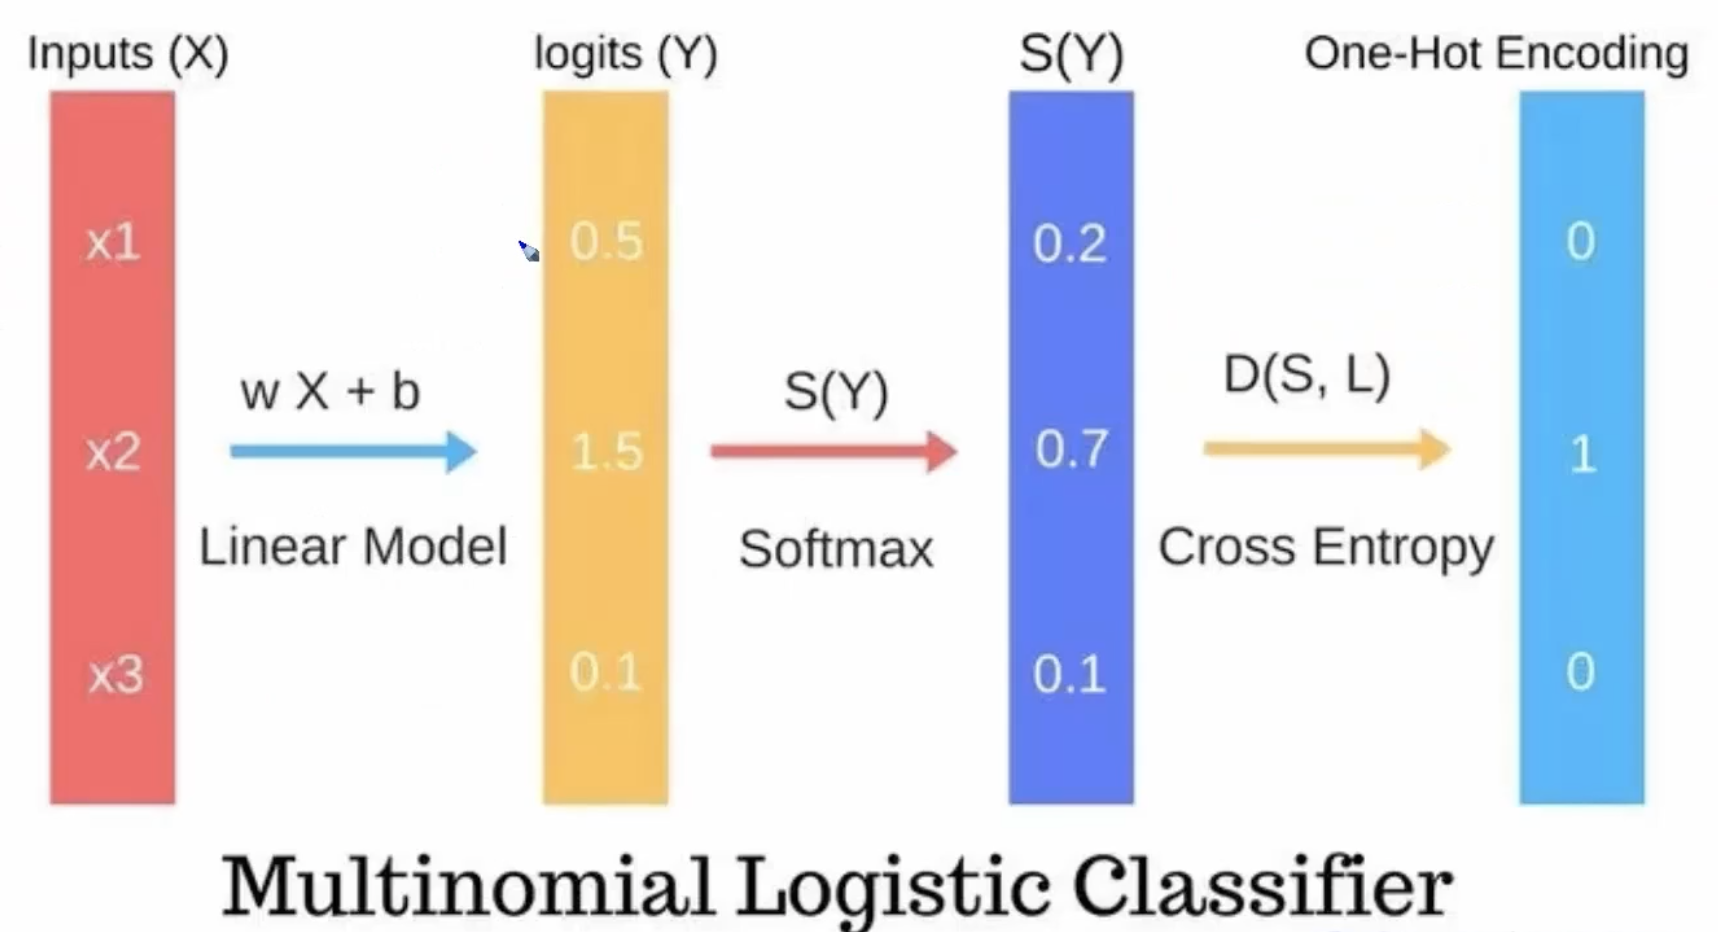

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y)
logreg_ovr = LogisticRegression(multi_class = 'ovr')
logreg_softmax = LogisticRegression(multi_class = 'multinomial', solver = 'sag')  # 'sag' solver : SGD의 발전된 버전

In [10]:
import warnings
warnings.filterwarnings("ignore")

logreg_ovr.fit(X_train, y_train)
logreg_softmax.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='sag')

#### multi_class = 'ovr'일 때

In [11]:
y_pred = logreg_ovr.predict(X_test)
y_true = y_test

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)              # 대각선 : 맞춘 것, 그 이외 : Error 값

array([[43,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 48,  0,  0,  0,  1,  1,  0,  2,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  2,  0,  1,  2,  0],
       [ 0,  2,  0,  0, 47,  0,  0,  1,  0,  0],
       [ 1,  0,  0,  0,  0, 35,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 50,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0,  4, 33]])

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        44
           1       0.91      0.92      0.91        52
           2       0.97      1.00      0.99        37
           3       1.00      0.89      0.94        44
           4       1.00      0.94      0.97        50
           5       0.90      0.95      0.92        37
           6       0.98      0.98      0.98        45
           7       0.96      1.00      0.98        49
           8       0.83      0.94      0.88        53
           9       0.97      0.85      0.90        39

    accuracy                           0.94       450
   macro avg       0.95      0.94      0.95       450
weighted avg       0.95      0.94      0.94       450



In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.9444444444444444

#### multi_class = 'multinomial'일 때

In [15]:
y_pred = logreg_softmax.predict(X_test)
y_true = y_test
accuracy_score(y_true, y_pred)

0.9644444444444444

In [16]:
from sklearn.metrics import recall_score
recall_score(y_true, y_pred, average = 'macro')  # average = 'micro'는 accuracy_score와 거의 비슷하므로

0.965032661768511

#### cross_val_score로 ovr, softmax 비교

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(logreg_ovr, X, y, scoring = 'accuracy', cv = 20, n_jobs = 8).mean()

0.9448439450686641

In [18]:
cross_val_score(logreg_softmax, X, y, scoring = 'accuracy', cv = 20, n_jobs = 8).mean()

0.9498751560549312

### OneVsRestClassifier

In [19]:
from sklearn.multiclass import OneVsRestClassifier

y_pred = OneVsRestClassifier(logreg_ovr).fit(X_train, y_train).predict(X_test)
y_true = y_test
accuracy_score(y_true, y_pred)

0.9444444444444444

In [20]:
# One vs Rest는 class의 개수만큼 estimator를 생성

len(OneVsRestClassifier(logreg_ovr).fit(X_train, y_train).estimators_)

10

### OneVsOneClassifier

In [21]:
from sklearn.multiclass import OneVsOneClassifier

y_pred = OneVsOneClassifier(logreg_ovr).fit(X_train, y_train).predict(X_test)
y_true = y_test
accuracy_score(y_true, y_pred)

0.9688888888888889

In [22]:
# One vs One은 mC2 = m(m-1)/2 만큼 estimator를 생성

len(OneVsOneClassifier(logreg_ovr).fit(X_train, y_train).estimators_)

45

참고 : http://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score

### [추가] Plot Confusion Matrix

In [23]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize = True'
    """
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment = 'center', 
                 color = 'white' if cm[i, j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [24]:
# Compute confusion matrix

class_names = digit_dataset['target_names']
cnf_matrix = confusion_matrix(y_true, y_pred)
cnf_matrix

array([[43,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  1,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 36,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 50,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 37]])

Confusion matrix without normalization
[[43  0  0  0  1  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  2  0]
 [ 0  0 37  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  1  0  0  2  0]
 [ 0  0  0  0 49  0  0  1  0  0]
 [ 0  0  0  0  0 36  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  1  0]
 [ 0  0  0  0  0  0  0 49  0  0]
 [ 0  2  1  0  0  0  0  0 50  0]
 [ 0  0  0  0  0  1  0  0  1 37]]
Normalized confusion matrix
[[0.98 0.   0.   0.   0.02 0.   0.   0.   0.   0.  ]
 [0.   0.96 0.   0.   0.   0.   0.   0.   0.04 0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.93 0.   0.02 0.   0.   0.05 0.  ]
 [0.   0.   0.   0.   0.98 0.   0.   0.02 0.   0.  ]
 [0.   0.   0.   0.   0.   0.97 0.   0.   0.   0.03]
 [0.   0.   0.   0.   0.   0.   0.98 0.   0.02 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.04 0.02 0.   0.   0.   0.   0.   0.94 0.  ]
 [0.   0.   0.   0.   0.   0.03 0.   0.   0.03 0.95]]


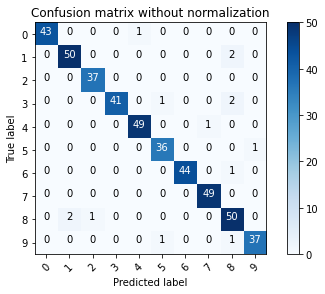

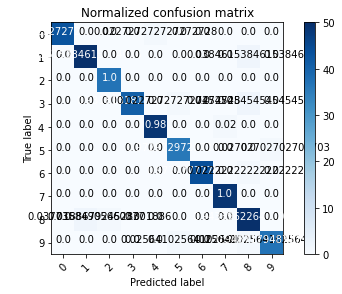

In [25]:
np.set_printoptions(precision = 2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = class_names, title = 'Confusion matrix without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = class_names, normalize = True, title = 'Normalized confusion matrix')

plt.show()